# Assignment 2

## Benjamin Ku
## PSTAT 234

### Below is Problem 1: Data Download. We create a function that will grab data based on endpoints that are from the NBA Stats website. This function will return a dataframe based on the parameters that we provide.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

### Below, we use the function to output a dataframe that has all NBA teams which include:
- MIN_YEAR: year of establishment
- TEAM_ID: team ID on NBA website
- ABBREVIATION: abbreviation of team name

In [2]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)
teams[teams.MAX_YEAR == '2017'] #take out teams no longer active
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI


### Similar to 04-Pandas-Data-Frame.ipynb, I will use the data download function from above to acquire the players' roster for all teams based on seasons. Later, we will use this in our sequence of widgets to populate all players of the selected year.

In [3]:
## get all players
params = {'LeagueID':'00', 'Season': '2016-17' , 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)
players = players[players.TO_YEAR == '2017'] #players that are currently active 
players = players[players.TEAM_ID != 0]
players.tail()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
4261,201152,"Young, Thaddeus",Thaddeus Young,1,2007,2017,thaddeus_young,1610612754,Indiana,Pacers,IND,pacers,Y
4265,203469,"Zeller, Cody",Cody Zeller,1,2013,2017,cody_zeller,1610612766,Charlotte,Hornets,CHA,hornets,Y
4270,203092,"Zeller, Tyler",Tyler Zeller,1,2012,2017,tyler_zeller,1610612738,Boston,Celtics,BOS,celtics,Y
4277,1627835,"Zipser, Paul",Paul Zipser,1,2016,2017,paul_zipser,1610612741,Chicago,Bulls,CHI,bulls,Y
4281,1627826,"Zubac, Ivica",Ivica Zubac,1,2016,2017,ivica_zubac,1610612747,Los Angeles,Lakers,LAL,lakers,Y


### Similar to 04-Pandas-Data-Frame.ipynb, I create a dictionary of all the teams and their associated IDs which are used universally in the data downloads from the NBA website. This will allow us to quickly identify the teams that we want, which will be useful in our widget selection of NBA teams.

In [4]:
#get all team names
allteam_dd_text = players.TEAM_CITY+' '+players.TEAM_NAME
allteam_dd = dict(zip(allteam_dd_text, players.TEAM_ID))
allteam_dd

{'Atlanta Hawks': 1610612737,
 'Boston Celtics': 1610612738,
 'Brooklyn Nets': 1610612751,
 'Charlotte Hornets': 1610612766,
 'Chicago Bulls': 1610612741,
 'Cleveland Cavaliers': 1610612739,
 'Dallas Mavericks': 1610612742,
 'Denver Nuggets': 1610612743,
 'Detroit Pistons': 1610612765,
 'Golden State Warriors': 1610612744,
 'Houston Rockets': 1610612745,
 'Indiana Pacers': 1610612754,
 'LA Clippers': 1610612746,
 'Los Angeles Lakers': 1610612747,
 'Memphis Grizzlies': 1610612763,
 'Miami Heat': 1610612748,
 'Milwaukee Bucks': 1610612749,
 'Minnesota Timberwolves': 1610612750,
 'New Orleans Pelicans': 1610612740,
 'New York Knicks': 1610612752,
 'Oklahoma City Thunder': 1610612760,
 'Orlando Magic': 1610612753,
 'Philadelphia 76ers': 1610612755,
 'Phoenix Suns': 1610612756,
 'Portland Trail Blazers': 1610612757,
 'Sacramento Kings': 1610612758,
 'San Antonio Spurs': 1610612759,
 'Toronto Raptors': 1610612761,
 'Utah Jazz': 1610612762,
 'Washington Wizards': 1610612764}

In [5]:
plyr_by_team_dd = dict()
for t, p in players.groupby('TEAM_ID'):
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))

plyr_dd_text = players.DISPLAY_LAST_COMMA_FIRST
plyr_dd_id = players.PERSON_ID
plyr_dd = dict(zip(plyr_dd_text, plyr_dd_id))
plyr_dd

{'Abrines, Alex': 203518,
 'Acy, Quincy': 203112,
 'Adams, Steven': 203500,
 'Afflalo, Arron': 201167,
 'Ajinca, Alexis': 201582,
 'Aldrich, Cole': 202332,
 'Aldridge, LaMarcus': 200746,
 'Allen, Tony': 2754,
 'Aminu, Al-Farouq': 202329,
 'Anderson, Justin': 1626147,
 'Anderson, Kyle': 203937,
 'Anderson, Ryan': 201583,
 'Antetokounmpo, Giannis': 203507,
 'Anthony, Carmelo': 2546,
 'Ariza, Trevor': 2772,
 'Arthur, Darrell': 201589,
 'Asik, Omer': 201600,
 'Augustin, D.J.': 201571,
 'Babbitt, Luke': 202337,
 'Baker, Ron': 1627758,
 'Baldwin IV, Wade': 1627735,
 'Barea, J.J.': 200826,
 'Barnes, Harrison': 203084,
 'Barton, Will': 203115,
 'Batum, Nicolas': 201587,
 'Bayless, Jerryd': 201573,
 'Baynes, Aron': 203382,
 'Bazemore, Kent': 203145,
 'Beal, Bradley': 203078,
 'Beasley, Malik': 1627736,
 'Beasley, Michael': 201563,
 'Belinelli, Marco': 201158,
 "Bembry, DeAndre'": 1627761,
 'Bender, Dragan': 1627733,
 'Bertans, Davis': 202722,
 'Beverley, Patrick': 201976,
 'Biyombo, Bismack': 2

### This is an example of categorizing the data based on team which is essentially the backbone concept for my sequence of widgets. Here below are only Boston Celtics players in Season 2007-08.

In [6]:
params = {'LeagueID': '00',
                'Season' : '2007-08',
                'IsOnlyCurrentSeason' : '0'}
player_year = get_nba_data('commonallplayers', params)
player_year = player_year[player_year.TEAM_ID != 0]
player_year[player_year.TEAM_ID == 1610612738]

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
55,951,"Allen, Ray",Ray Allen,1,1996,2013,ray_allen,1610612738,Boston,Celtics,BOS,celtics,Y
56,2754,"Allen, Tony",Tony Allen,1,2004,2017,tony_allen,1610612738,Boston,Celtics,BOS,celtics,Y
482,136,"Brown, P.J.",P.J. Brown,1,1993,2007,p.j._brown,1610612738,Boston,Celtics,BOS,celtics,Y
618,208,"Cassell, Sam",Sam Cassell,1,1993,2007,sam_cassell,1610612738,Boston,Celtics,BOS,celtics,Y
863,201175,"Davis, Glen",Glen Davis,1,2007,2014,glen_davis,1610612738,Boston,Celtics,BOS,celtics,Y
1283,708,"Garnett, Kevin",Kevin Garnett,1,1995,2015,kevin_garnett,1610612738,Boston,Celtics,BOS,celtics,Y
1735,2067,"House, Eddie",Eddie House,1,2000,2010,eddie_house,1610612738,Boston,Celtics,BOS,celtics,Y
2986,2570,"Perkins, Kendrick",Kendrick Perkins,1,2003,2017,kendrick_perkins,1610612738,Boston,Celtics,BOS,celtics,Y
3018,1718,"Pierce, Paul",Paul Pierce,1,1998,2016,paul_pierce,1610612738,Boston,Celtics,BOS,celtics,Y
3041,1513,"Pollard, Scot",Scot Pollard,1,1997,2007,scot_pollard,1610612738,Boston,Celtics,BOS,celtics,Y


## Home Court Advantage?

### Below are Problem 2, Problem 3, and part of Problem 4 combined. I created a sequence of widgets (6 widgets in total).

1. If you look at my output, you will see that there is a text widget that will prompt you to enter in the Season Year of the NBA data that we desire.
2. Once the desired season year is inputted, press the 'Populate Players' button widget.
3. This will prompt the rest of the widgets: team, player, season, and get player data.
4. Similar to the 04-Pandas-Data-Frame.ipynb that we learned in class, the players will change based on the team selected.
5. In addition, my extra widget event handler is that of the Season Year selected. 
6. Essentially, the idea is that every Season Year has different players in each team and my code makes those players change based on the Season Year.
7. After the desired team and player are selected, you can also pick the Season Type that we want to see the game data for that player.
8. After all widget options are selected, you may click on the last widget 'Get player info!' and this will display a bar chart comparing the Field Goal Percentages of the Home and Away games of the selected Season Year for that player.

#### Example: 2007-08 Boston Celtics Team Roster will match up and also provide game data for the player chosen.
#### Link for Comparison: https://en.wikipedia.org/wiki/2007%E2%80%9308_Boston_Celtics_season#Roster

#### A very good example of this comparison will involve the following choices for our widgets:
1. 2014-15
2. Golden State Warriors
3. Barbosa, Leandro
4. Regular Season

### To see another player's statistics, simply Run the line of code again and it will start the widget sequence over.


In [22]:
from ipywidgets import interact, FloatSlider, Dropdown, Button
import ipywidgets as widgets

year = widgets.Text(
        value='2016-17',
        placeholder='Format: NNNN-NN (eg. 1995-96)',
        description='Season Year',
        disabled=False
        )

def update_year(change):
    params = {'LeagueID': '00',
                'Season' : year.value,
                'IsOnlyCurrentSeason' : '0'}
    player_year = get_nba_data('commonallplayers', params)
    player_year = player_year[player_year.TEAM_ID != 0] #takes out all players not affiliated
    #creates dictionary based on all players in this year
    plyr_by_team_dd = dict()
    for t, p in player_year.groupby('TEAM_ID'):
        plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))
    #organizes dictionary
    plyr_dd_text = player_year.DISPLAY_LAST_COMMA_FIRST
    plyr_dd_id = player_year.PERSON_ID
    plyr_dd = dict(zip(plyr_dd_text, plyr_dd_id))
    selected = "Golden State Warriors"
    team_menu = Dropdown(options=allteam_dd, label = selected)
    player_menu = Dropdown(options=plyr_by_team_dd[allteam_dd[selected]])
    season_type = widgets.ToggleButtons(
                options=['Pre Season', 'Regular Season', 'Playoffs'],
                description='Season Type:',
                value = 'Regular Season',
                disabled=False)
    player_info = Button(description = 'Get player info!', icon = 'check')
    def player(stats):
        params = {'PlayerID' : player_menu.value,
                    'Season' : year.value,
                'SeasonType' : season_type.value}
        player_log = get_nba_data('playergamelog', params)  
        player_log['Opponent']=(player_log['MATCHUP']).str[-3:] #gets the abbreviation for opponent based on MATCHUP column
        player_log['Location']=(player_log['MATCHUP']).str[4]
        player_log['Location'] = player_log['Location'].map({'v': 'Home', '@': 'Away'}) #organizes matchup into location
        player_log
        objects = ('Home','Away')
        y_pos = np.arange(len(objects))
        fg_pct = [player_log.groupby('Location')['FG_PCT'].mean()['Home'], player_log.groupby('Location')['FG_PCT'].mean()['Away']]
        plt.bar(y_pos, fg_pct, align='center', alpha=0.5, width = 0.5)
        plt.xticks(y_pos, objects)
        plt.ylabel('Field Goal Percentage')
        plt.title('Field Goal Percentage of Player')
        plt.show()     
    def update_team(change):
        player_menu.options = plyr_by_team_dd[change['new']]
    display(team_menu, player_menu, season_type, player_info) #players in entered season year
    team_menu.observe(update_team, names='value') #update players accordingly by choosing which team
    player_info.on_click(player)

populate = Button(description = 'Populate Players', icon = 'check')
populate.on_click(update_year)

print ("Get Player Details! Note: 2017-18 Playoffs Season data not available")
display(year, populate)

Get Player Details! Note: 2017-18 Playoffs Season data not available


Text(value='2016-17', description='Season Year', placeholder='Format: NNNN-NN (eg. 1995-96)')

Button(description='Populate Players', icon='check', style=ButtonStyle())

### Below I expand on what happens in our code above that allows us to produce such a powerful comparison with our Home and Away games for a certain player.

#### This is the first section of the code for the function player(stats).

#### I replaced the PlayerID, Season, and SeasonType to be static with Stephen Curry, 2017-18 Season, and Regular Season respectively.

#### Shown here is my transformation of the code. Since the Data Download doesn't give us the Opponent Name in a single column, we have to transform it to our liking.
- There is a key indicator in the MATCHUP column where it either says 'GSW @ LAL' or 'GSW vs. LAL'
- This means that we can use '@' or 'vs.' to indicate whether or not it is a Home or Away game.
- After adding our new columns, I organize two data frames so that they are organized by Location.

In [8]:
params_player = {'PlayerID' : '201939',
              'Season' : '2017-18',
              'SeasonType' : 'Regular Season'}
player_log = get_nba_data('playergamelog', params_player)
    
player_log['Opponent']=(player_log['MATCHUP']).str[-3:] #gets the abbreviation for opponent based on MATCHUP column
player_log['Location']=(player_log['MATCHUP']).str[4]
player_log['Location'] = player_log['Location'].map({'v': 'Home', '@': 'Away'}) #organizes matchup into location
player_log



player_log

#fgm, fga, fg_pct, fg3m, fg3a, fg3_pct, ftm, fta, ft_pct, oreb, dreb, reb, ast, stl, blk, tov, pf, pts

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent,Location
0,22017,201939,0021701087,"MAR 23, 2018",GSW vs. ATL,W,25,10,18,0.556,...,1,0,1,1,1,29,9,1,ATL,Home
1,22017,201939,0021700976,"MAR 08, 2018",GSW vs. SAS,W,2,0,1,0.000,...,0,0,0,0,0,2,-1,1,SAS,Home
2,22017,201939,0021700963,"MAR 06, 2018",GSW vs. BKN,W,34,12,20,0.600,...,4,3,1,3,2,34,11,1,BKN,Home
3,22017,201939,0021700928,"MAR 02, 2018",GSW @ ATL,W,23,8,15,0.533,...,3,2,0,0,0,28,2,1,ATL,Away
4,22017,201939,0021700917,"FEB 28, 2018",GSW @ WAS,W,35,5,15,0.333,...,3,2,0,6,3,25,20,2,WAS,Away
5,22017,201939,0021700900,"FEB 26, 2018",GSW @ NYK,W,30,8,16,0.500,...,5,0,0,3,1,21,25,1,NYK,Away
6,22017,201939,0021700887,"FEB 24, 2018",GSW vs. OKC,W,30,8,19,0.421,...,6,3,0,2,2,21,24,1,OKC,Home
7,22017,201939,0021700872,"FEB 22, 2018",GSW vs. LAC,W,37,14,19,0.737,...,10,2,0,4,4,44,8,1,LAC,Home
8,22017,201939,0021700864,"FEB 14, 2018",GSW @ POR,L,34,6,17,0.353,...,6,3,0,7,4,17,-7,1,POR,Away
9,22017,201939,0021700846,"FEB 12, 2018",GSW vs. PHX,W,30,8,17,0.471,...,7,0,1,3,3,22,21,1,PHX,Home


These are a list of useful variables that are available in the dataframe. We can easily change our code to compared these variables in the Home and Away games for that particular season.

- FGM: Field Goals Made
- FGA: Field Goals attempted
- FG_PCT: Field Goals Percentage
- FG3M: 3-pointers Made
- FG3A: 3-pointers Attempted
- FG3_PCT: 3-pointers Percentage
- FTM: Free Throws Made
- FTA: Free Throws Attempted
- FT_PCT: Free Throws Percentage
- OREB: Offensive Rebounds
- DREB: Defensive Rebounds
- REB: Rebounds
- AST: Assists
- STL: Steals
- BLK: Blocks
- TOV: Turnovers
- PF: Personal Fouls
- PTS: Points

We will use the split-apply-combine approach to compare the Home and Away Games Field Goals Percentage of the particular player we have chosen.

In this next sections, I split based on Location and then apply the mean according to the Field Goal Percentage column. Then I can plot this data into a bar graph, as shown below.

In [9]:
for r, d in player_log.groupby('Location'):
    print("***", r)
    print(d)

*** Away
   SEASON_ID  Player_ID     Game_ID     GAME_DATE    MATCHUP WL  MIN  FGM  \
3      22017     201939  0021700928  MAR 02, 2018  GSW @ ATL  W   23    8   
4      22017     201939  0021700917  FEB 28, 2018  GSW @ WAS  W   35    5   
5      22017     201939  0021700900  FEB 26, 2018  GSW @ NYK  W   30    8   
8      22017     201939  0021700864  FEB 14, 2018  GSW @ POR  L   34    6   
13     22017     201939  0021700782  FEB 03, 2018  GSW @ DEN  L   36    8   
14     22017     201939  0021700774  FEB 02, 2018  GSW @ SAC  W   36    7   
15     22017     201939  0021700751  JAN 30, 2018  GSW @ UTA  L   30    4   
19     22017     201939  0021700679  JAN 20, 2018  GSW @ HOU  L   36    6   
20     22017     201939  0021700657  JAN 17, 2018  GSW @ CHI  W   35   10   
21     22017     201939  0021700646  JAN 15, 2018  GSW @ CLE  W   33    8   
22     22017     201939  0021700631  JAN 13, 2018  GSW @ TOR  W   34    6   
24     22017     201939  0021700578  JAN 06, 2018  GSW @ LAC  W   3

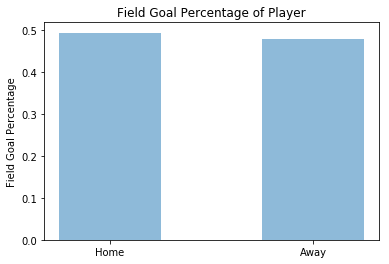

In [10]:
player_log.groupby('Location')['FG_PCT'].mean()

objects = ('Home','Away')
y_pos = np.arange(len(objects))
fg_pct = [player_log.groupby('Location')['FG_PCT'].mean()['Home'], player_log.groupby('Location')['FG_PCT'].mean()['Away']]
 
x = plt.bar(y_pos, fg_pct, align='center', alpha=0.5, width = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Field Goal Percentage')
plt.title('Field Goal Percentage of Player')

plt.show()

### I decided to also look at Team Field Goal Percentage Against All Teams for Home vs. Away Game 1. This involved a lot of transforming of data. Below, we see all the columns available for us when we Data Download the Team Game Log.

### I decided to pick the Golden State Warriors in Season 2015-16 because in this year, the GSW set the all time win record of 73-9, wins to losses. This can be seen in my last data visualization which shows the trend of GSW Win Percentage since the first recorded season in the NBA.

In [11]:
params_team = {'TeamID' : '1610612744',
              'Season' : '2015-16',
              'SeasonType' : 'Regular Season'}
team_log = get_nba_data('teamgamelog', params_team)
team_log #new all time win record set by GSW 
team_log.columns.values

array(['Team_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'W', 'L',
       'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'], dtype=object)

### Shown here is my transformation of the code. Since the Data Download doesn't give us the Opponent Name in a single column, we have to transform it to our liking.

### In addition, there is an indicator in the MATCHUP column where it either says 'GSW @ LAL' or 'GSW vs. LAL'
### This means that we can use '@' or 'vs.' to indicate whether or not it is a Home or Away game.
### After adding our new columns, I organize two data frames so that they are organized by Location.
### Due to the matchup sequence of the NBA, not all teams will meet more than Home and Away. However, every team will play the GSW once, so that is what I will graph first.

In [12]:
team_log['Opponent']=(team_log['MATCHUP']).str[-3:] #gets the abbreviation for opponent based on MATCHUP column
team_log['Location']=(team_log['MATCHUP']).str[4]
team_log['Location'] = team_log['Location'].map({'v': 'Home', '@': 'Away'}) #organizes matchup into location
team_log['Game Number'] = team_log.groupby(['Opponent', 'Location']).cumcount(ascending=False) + 1 #organizes based on Opponent and Location
game_1 = team_log['Game Number'] == 1 #Only want game 1
first_game = team_log[game_1]
first_game_Home = first_game[first_game['Location'] == 'Home'] #two different data frames for Home and Away
first_game_Away = first_game[first_game['Location'] == 'Away']
first_game_Home = first_game_Home.sort_values(by = 'Opponent') #sort in alphabetical order
first_game_Away = first_game_Away.sort_values(by = 'Opponent')

### In this section, you can see that our statistics align up if we organize it based on Location: they are grouped by 'Home' or 'Away' as seen by the ouput below.

In [13]:
for r, d in first_game.groupby('Location'):
    print("***", r)
    print(d)

*** Away
       Team_ID     Game_ID     GAME_DATE    MATCHUP WL   W  L  W_PCT  MIN  \
13  1610612744  0021501036  MAR 19, 2016  GSW @ SAS  L  62  7  0.899  240   
24  1610612744  0021500874  FEB 27, 2016  GSW @ OKC  W  53  5  0.914  265   
25  1610612744  0021500855  FEB 25, 2016  GSW @ ORL  W  52  5  0.912  240   
26  1610612744  0021500848  FEB 24, 2016  GSW @ MIA  W  51  5  0.911  240   
27  1610612744  0021500836  FEB 22, 2016  GSW @ ATL  W  50  5  0.909  240   
33  1610612744  0021500739  FEB 03, 2016  GSW @ WAS  W  45  4  0.918  240   
34  1610612744  0021500718  JAN 31, 2016  GSW @ NYK  W  44  4  0.917  240   
35  1610612744  0021500707  JAN 30, 2016  GSW @ PHI  W  43  4  0.915  240   
39  1610612744  0021500634  JAN 20, 2016  GSW @ CHI  W  39  4  0.907  240   
40  1610612744  0021500622  JAN 18, 2016  GSW @ CLE  W  38  4  0.905  240   
41  1610612744  0021500605  JAN 16, 2016  GSW @ DET  L  37  4  0.902  240   
46  1610612744  0021500548  JAN 08, 2016  GSW @ POR  W  34  2  0.94

### Below, I plot the 2015-16 Season Year of the Golden State Warriors which will compare the first Home and Away games of the season against all teams.

[]

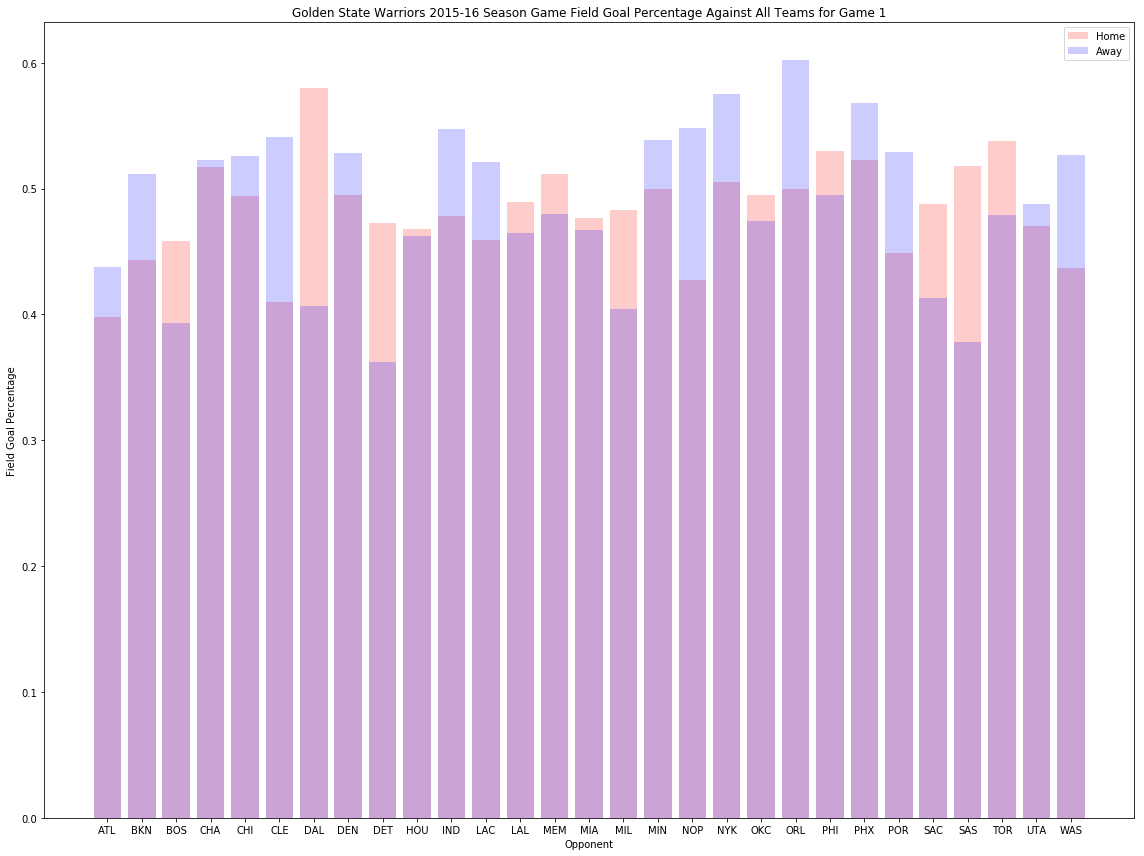

In [14]:
plt.figure(figsize=(16,12))

index = np.arange(len(first_game_Home['Opponent']))
 
home_bar = plt.bar(index, first_game_Home['FG_PCT'],
                 alpha=0.2,
                 color='r',
                 label='Home')
 
away_bar = plt.bar(index, first_game_Away['FG_PCT'],
                 alpha=0.2,
                 color='b',
                 label='Away')
 
plt.xlabel('Opponent')
plt.ylabel('Field Goal Percentage')
plt.title('Golden State Warriors 2015-16 Season Game Field Goal Percentage Against All Teams for Game 1')
plt.xticks(index, (first_game_Home['Opponent']))
plt.legend()
 
plt.tight_layout()
plt.plot()

In [15]:
team_log.groupby('Location')['FG_PCT'].mean()

Location
Away    0.482707
Home    0.494244
Name: FG_PCT, dtype: float64

### As you can see by the code above and also our visualization, there is not a significant difference between the Golden State Warriors team in Season Year 2015-16 for Home and Away games. Home games may have a slight advantage in terms of Field Goal Percentage, but it is very small.

In [16]:
params =   {'TeamID' : '1610612744',
            'LeagueID' : '00',
            'PerMode' : 'PerGame',
        'SeasonType' : 'Regular Season'}
team_yr = get_nba_data('teamyearbyyearstats', params)
team_yr.columns.values

array(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'], dtype=object)

### As you can see from below, there is a large spike in the win percentage for season 2015-16. This is the reasoning why I chose my dataset for earlier. The Field Goal Percentage is relatively high compared throughout the entire season, which attributes to GSW setting a record of 73-9.

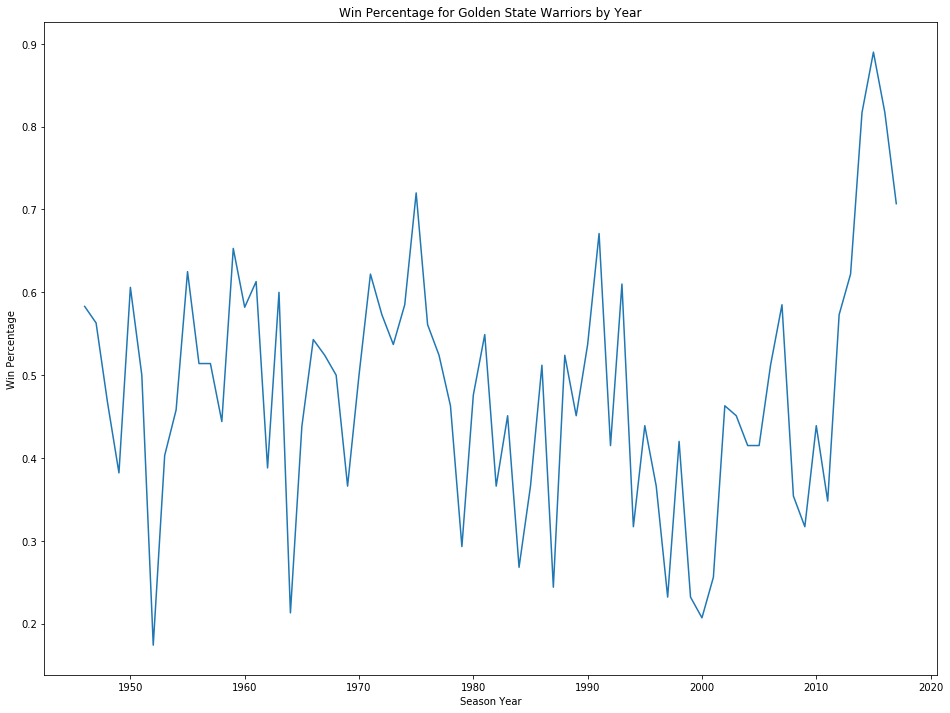

In [17]:
plt.figure(figsize=(16,12))

team_yr['YEAR_rev']=(team_yr['YEAR']).str[:4]
team_yr['YEAR_rev']
plt.xlabel('Season Year')
plt.ylabel('Win Percentage')
plt.title('Win Percentage for Golden State Warriors by Year')
plt.plot(team_yr['YEAR_rev'], team_yr['WIN_PCT'])